In [1]:
import os
from os.path import dirname

root_dir = dirname(os.getcwd())
os.chdir(root_dir)

In [2]:
import random
import torch
import numpy as np
import matplotlib.pyplot as plt

In [3]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

device = 'cpu'

In [4]:
from src.nn.models import DengueNN

In [5]:
nn = DengueNN(
    device=device,
    data_csv_path='data/calibration/bello/data.csv',
    params_yaml_path='data/params/bello/params.yaml',
    lr=1e-2,
    epochs=1000,
    hidden_dim=20,
    hidden_num=3,
)

In [6]:
hist, pred_data = nn.train()

Epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

Best Loss: 0.0260


In [7]:
true_data = nn.cumulative_cases

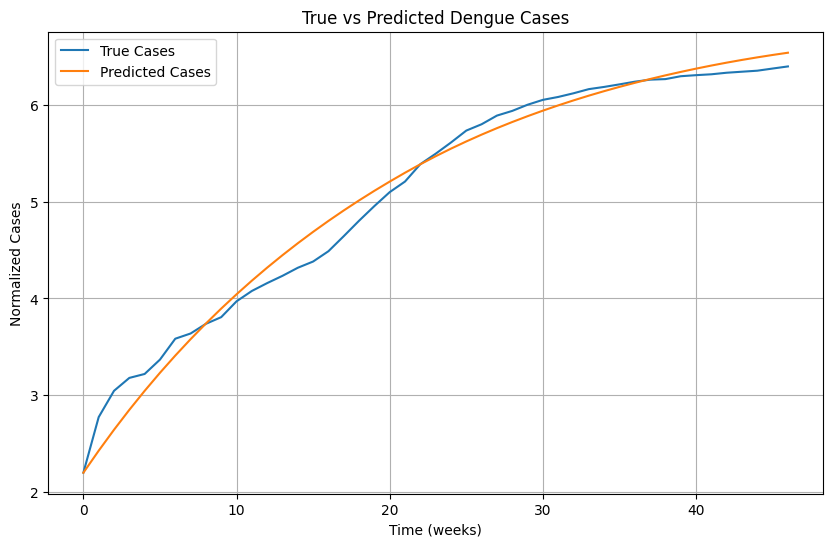

In [8]:
# Plot true vs predicted dengue cases
plt.figure(figsize=(10, 6))
plt.plot(true_data, label='True Cases')
plt.plot(pred_data, label='Predicted Cases')
plt.xlabel('Time (weeks)')
plt.ylabel('Normalized Cases')
plt.title('True vs Predicted Dengue Cases')
plt.legend()
plt.grid(True)
plt.show()

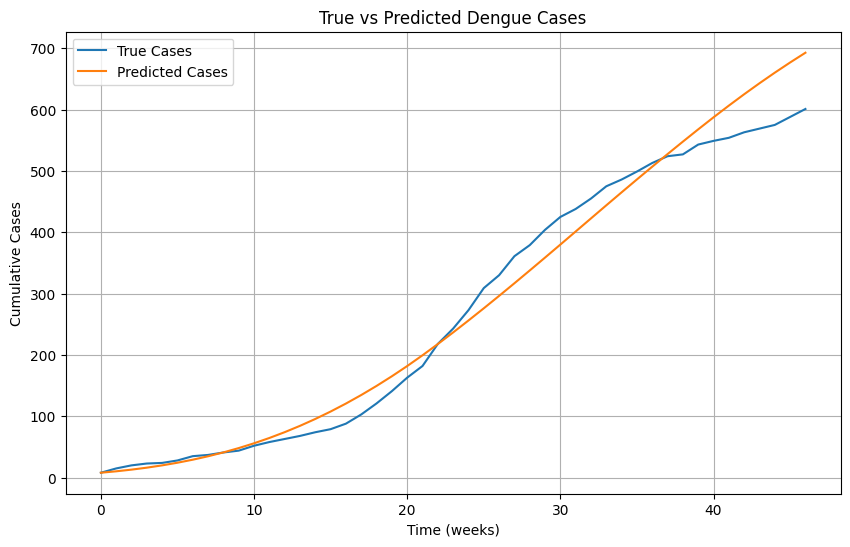

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(true_data.expm1(), label='True Cases')
plt.plot(np.expm1(pred_data), label='Predicted Cases')
plt.xlabel('Time (weeks)')
plt.ylabel('Cumulative Cases')
plt.title('True vs Predicted Dengue Cases')
plt.legend()
plt.grid(True)
plt.show()

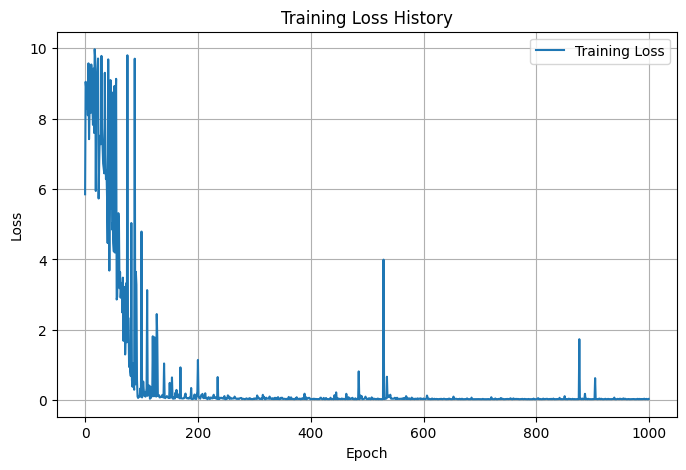

In [10]:
# Plot loss history
plt.figure(figsize=(8, 5))
plt.plot(hist, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss History')
plt.legend()
plt.grid(True)
plt.show()